# K Median clustering

- K-Menas에서는 데이터의 평균을 사용하기 때문에 outlier에 민감한 모델임을 실험을 통해 알아봤습니다.
<br>
- 이번에는 데이터의 중간값(median)을 사용하여 centroids를 계산하여 군집화를 진행하겠습니다.

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 예제 데이터 )  이상값이 존재하는 데이터셋

In [5]:
# 예제 데이터 셋 
!wget https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/kmedian_dataset.csv
dataset = np.loadtxt("./kmedian_dataset.csv",delimiter=',')

--2019-06-11 11:35:37--  https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/kmedian_dataset.csv
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.58.65
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.58.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 546 [text/csv]
Saving to: ‘kmedian_dataset.csv.2’

kmedian_dataset.csv 100%[===================>]     546  --.-KB/s    in 0s      

2019-06-11 11:35:38 (23.4 MB/s) - ‘kmedian_dataset.csv.2’ saved [546/546]



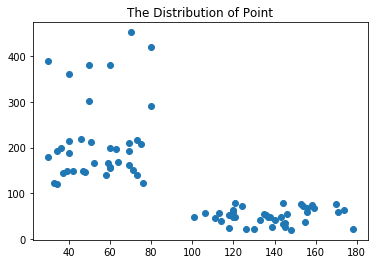

In [6]:
# 예제 데이터셋 시각화
plt.title("The Distribution of Point")
plt.scatter(dataset[:,0], dataset[:,1])
plt.show()

## K-median 알고리즘 <br>
####K-median 구현또한 아래 사항이 중요한 Keypoint이다. <br>
1. Broadcast를 사용하여 각 centroids별 dataset과의 거리 구함
<br>( 3차원에서 centroid는 axis=0으로 broadcast, dataset은 axis=1로 broadcast된다)
2. argmin연산을 통해 최소거리 군집의 index를 얻기<br>
.

In [0]:
def cluster_Kmedian(dataset, k):    
    # 중심점 초기화
    # 데이터의 범위를 지정
    min_x = dataset[:,0].min()
    max_x = dataset[:,0].max() 
    min_y = dataset[:,1].min()
    max_y = dataset[:,1].max() 

    #Uniform distribution을 통해 임의의 center_x와 center_y를 구함
    # 이때, K개 만큼 생성함
    center_x = np.random.uniform(low=min_x, high=max_x, size=k)
    center_y = np.random.uniform(low=min_y, high=max_y, size=k)
    
    #임의의 central point를 생성
    centroids = np.stack([center_x,center_y],axis=-1)
    
    # (2) ~ (5) 순회
    num_data = dataset.shape[0]
    cluster_per_point = np.zeros((num_data)) # 각 점 별 군집

    counter = 0
    while True:
        prev_cluster_per_point = cluster_per_point
        
        # (2) 거리 계산
        # Broad Casting 을 사용한 Numpy연산
        # Dataset과 centroids의 shape을 유념한다.
        # 3차원에서 centroid는 axis=0으로 broadcast, dataset은 axis=1로 broadcast된다
        diff_mat = (centroids.reshape(-1,1,2) - dataset.reshape(1,-1,2))
        dists = np.sqrt((diff_mat**2).sum(axis=-1))
        
        # (3) 각 K개의 centroid들마다 dataset과의 거리중 가장 작은 index 구함(argmin)
        cluster_per_point = dists.argmin(axis=0)
        
        # (4) 각 군집 별 점들의 중간값 median을 계산 후, 군집의 중심점을 다시 계산
        # 이번에도 A[index_배열] = A의 해당 index의 값들이 return됨이 중요함
        for i in range(k):
            centroids[i] = np.median( dataset[cluster_per_point==i], axis=0) # np.median연산
            
        if np.all(prev_cluster_per_point == cluster_per_point):
            break

        counter += 1
        plt.title("{}th Distribution of Dataset".format(counter))
        for idx, color in enumerate(['r','g','b','y']):
            mask = (cluster_per_point==idx)
            plt.scatter(dataset[mask,0],dataset[mask,1],
                        label='dataset', c=color)
            plt.scatter(centroids[:,0],centroids[:,1],
                        s=200, label="centroid", marker='+')
        plt.show()
    
    return centroids

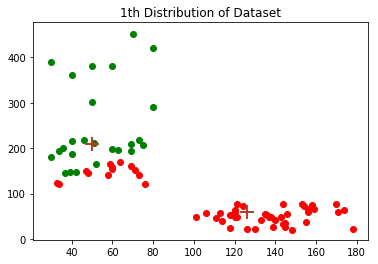

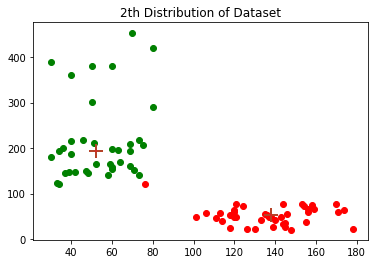

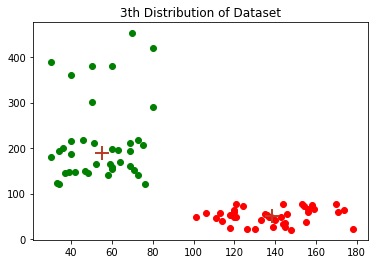

array([[138.5,  50. ],
       [ 55. , 190. ]])

In [13]:
# k = 2일때 시각화를 통한 군집확인
cluster_Kmedian(dataset,2)

# Result and conclusion
- __데이터 사이의 중간값을 사용하는 K-Median을 사용 했기 때문에 해당 데이터세트의 noise에는 덜 민감한 모델__
- 그러나 모든 데이터도메인에서 중간값계산이 robust한 모델인지는 보증할 수 없음.
- __데이터의 사전 분석을 수행하고 그에 따른 알맞는 모델을 찾는것이 중요하다.__


